In [16]:
#Importing libraries
import numpy as np
import pandas as pd
import math

In [17]:
#reading data file
filename = 'abc.txt'
data = np.loadtxt(filename,delimiter='\t')

In [18]:
#Separating X and Y columns
x0 = data[0:,0]
y0 = data[0:,1]

In [19]:
#College requirements
print('x\ty\txy\tx^2')

XY = x0*y0
Xr2 = x0**2

#Actual calculations
x = np.sum(x0)
y = np.sum(y0)
xy = np.sum(XY)
xr2 = np.sum(Xr2)
no = x0.shape[0]

temp1 = [x,y,xy,xr2]
temp1_ = np.array(temp1)

#Table required for college
temp = [x0,y0,XY,Xr2]
df = np.transpose(np.array(temp))
df = np.vstack((df,temp1))
print(pd.DataFrame(df))



x	y	xy	x^2
      0       1        2       3
0  10.0   240.0   2400.0   100.0
1  12.0   260.0   3120.0   144.0
2  14.0   300.0   4200.0   196.0
3  16.0   330.0   5280.0   256.0
4  18.0   370.0   6660.0   324.0
5  20.0   420.0   8400.0   400.0
6  90.0  1920.0  30060.0  1420.0


In [20]:
#Guass elimination
n = 2

# Making numpy array of n x n+1 size and initializing 
# to zero for storing augmented matrix
a = np.zeros((n,n+1))

# Making numpy array of n size and initializing 
# to zero for storing solution vector
root = np.zeros(n)

a[0][0]=x
a[0][1]=no
a[0][2]=y
a[1][0]=xr2
a[1][1]=x
a[1][2]=xy

print(a)
# Applying Gauss Elimination
for i in range(n):
    if a[i][i] == 0.0:
        print('Divide by zero detected!')
        break

    for j in range(i+1, n):
        ratio = a[j][i]/a[i][i]

        for k in range(n+1):
            a[j][k] = a[j][k] - ratio * a[i][k]

# Back Substitution
root[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2,-1,-1):
    root[i] = a[i][n]

    for j in range(i+1,n):
        root[i] = root[i] - a[i][j]*root[j]

    root[i] = root[i]/a[i][i]

[[9.000e+01 6.000e+00 1.920e+03]
 [1.420e+03 9.000e+01 3.006e+04]]


In [21]:
#results
print('m = %0.5f \nc = %0.5f' %(root[0],root[1]))

print('\ny=mx+c')
print('y = %0.5f x+%0.5f' %(root[0],root[1]))

m = 18.00000 
c = 50.00000

y=mx+c
y = 18.00000 x+50.00000


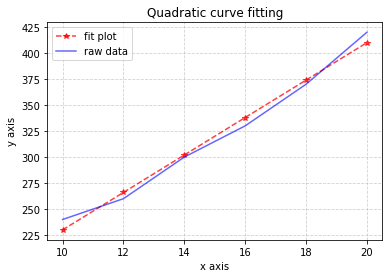

<Figure size 20000x10000 with 0 Axes>

In [22]:
from matplotlib import pyplot as plt

x = np.linspace(x0[0],x0[x0.shape[0]-1],x0.shape[0])
y = root[0]*x + root[1]

plt.plot(x, y,'r*--',alpha = 0.75,label = 'fit plot')
plt.plot(x0,y0,'b-',alpha = 0.6, label = 'raw data')

plt.title('Quadratic curve fitting')
plt.xlabel('x axis') 
plt.ylabel('y axis') 
plt.grid(alpha =.6, linestyle ='--')
plt.legend()
plt.figure(figsize=(20,10),dpi=1000)

plt.show()